In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')
df



,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


Noticed theres alot of missing cells. So, added code to update to a standard missing cell.


In [5]:
missing_values=["s", "na"]
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv',na_values=missing_values)
df



,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   212331 non-null  object 
 1   School Name                  212331 non-null  object 
 2   School Level                 212331 non-null  object 
 3   Regents Exam                 212321 non-null  object 
 4   Year                         212331 non-null  int64  
 5   Total Tested                 212331 non-null  int64  
 6   Mean Score                   137109 non-null  float64
 7   Number Scoring Below 65      137109 non-null  float64
 8   Percent Scoring Below 65     137109 non-null  float64
 9   Number Scoring 65 or Above   137109 non-null  float64
 10  Percent Scoring 65 or Above  137109 non-null  float64
 11  Number Scoring 80 or Above   137109 non-null  float64
 12  Percent Scoring 80 or Above  137109 non-null  float64
 13 

Needed to see the different unique data in Year, Regents Exam & School Level columns.

In [19]:
df = pd.DataFrame(df)
df['Regents Exam'].unique()


array(['Common Core Algebra', 'Living Environment', 'Common Core English',
       'Algebra2/Trigonometry', 'Common Core Algebra2',
       'Common Core Geometry', 'English', 'Geometry',
       'Global History and Geography', 'Integrated Algebra',
       'Physical Settings/Chemistry', 'Physical Settings/Earth Science',
       'U.S. History and Government', 'Physical Settings/Physics', nan],
      dtype=object)

In [20]:
df['Year'].unique()

array([2017, 2015, 2016])

In [21]:
df['School Level'].unique()

array(['K-8', 'High school', 'Junior High-Intermediate-Middle',
       'Secondary School', 'K-12 all grades', 'Elementary'], dtype=object)

Wanted to see how many cells are missing data so I can tell which columns would be useful in analizing. If too much data is missing from a column then that column wouldnt be useful. 

In [22]:
df.isnull().sum()

School DBN                          0
School Name                         0
School Level                        0
Regents Exam                       10
Year                                0
Total Tested                        0
Mean Score                      75222
Number Scoring Below 65         75222
Percent Scoring Below 65        75222
Number Scoring 65 or Above      75222
Percent Scoring 65 or Above     75222
Number Scoring 80 or Above      75222
Percent Scoring 80 or Above     75222
Number Scoring CR              142680
Percent Scoring CR             142680
dtype: int64

Also noticed earlier that some of the rows may have duplicate information. Ran a code to identify how many duplicate rows. out of the 212331 rows. 

In [25]:
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.duplicated(subset=['School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested']).sum()

30707

In [29]:
df.loc[df.duplicated(), :]

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
3406,01M650,Cascades High School,High school,Geometry,2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7571,08X507,Stevenson Yabc,High school,Common Core Geometry,2016,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9454,08X507,Stevenson Yabc,High school,Geometry,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9484,08X507,Stevenson Yabc,High school,Geometry,2016,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11389,10X667,Grace Dodge Yabc,High school,Geometry,2015,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212316,84X706,Harriet Tubman Charter School,K-8,Living Environment,2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212317,84X706,Harriet Tubman Charter School,K-8,U.S. History and Government,2017,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212318,84X717,Icahn Charter School,K-8,Common Core Algebra,2015,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212319,84X717,Icahn Charter School,K-8,Common Core Algebra,2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop the duplicates where the entire row matches

In [31]:
df.drop_duplicates(inplace=True)
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212325,84X717,Icahn Charter School,K-8,Living Environment,2015,6,79.8,0.0,0.0,6.0,100.0,2.0,33.3,NaN,NaN
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop columns

In [66]:
drop_cols=['School DBN', 'Mean Score', 'Number Scoring Below 65','Percent Scoring Below 65','Number Scoring 65 or Above','Percent Scoring 65 or Above', 'Number Scoring 80 or Above','Percent Scoring 80 or Above', 'Number Scoring CR','Percent Scoring CR']
drop_cols1=['Mean Score']




In [67]:
df

,School Name,School Level,Regents Exam,Year,Total Tested
0,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4
1,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16
2,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9
3,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3
4,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2
...,...,...,...,...,...
212325,Icahn Charter School,K-8,Living Environment,2015,6
212326,Icahn Charter School,K-8,Living Environment,2016,8
212327,Icahn Charter School,K-8,Living Environment,2016,5
212328,Icahn Charter School,K-8,Living Environment,2017,6


Noticed some rows were duplicates but had different “Total Tested” amounts but everything else was the same. Sort then delete the duplicates.

In [70]:
df=df.sort_values('Total Tested',ascending=False)
df = df.drop_duplicates(subset=['School Name', 'School Level', 'Regents Exam', 'Year'], keep ='first')
df

,School Name,School Level,Regents Exam,Year,Total Tested
8612,Brooklyn Technical High School,High school,Physical Settings/Physics,2017,1729
8611,Brooklyn Technical High School,High school,Physical Settings/Physics,2016,1648
12137,New Utrecht High School,High school,Common Core English,2016,1554
8594,Brooklyn Technical High School,High school,Common Core Geometry,2017,1527
8610,Brooklyn Technical High School,High school,Physical Settings/Physics,2015,1515
...,...,...,...,...,...
10077,Gotham Professional Arts Academy,High school,Common Core Algebra,2016,1
10092,Research and Service High School,High school,Geometry,2015,1
9978,"School of Business, Finance and Entrepreneurship",Junior High-Intermediate-Middle,Common Core English,2015,1
9980,Frederick Douglass Academy IV Secondary School,High school,Algebra2/Trigonometry,2016,1


Question: How many students were tested for the three years and which exam had the most tested? 

In [73]:
df.groupby(['Year'])['School Name'].count()

Year
2015    6571
2016    7038
2017    5673
Name: School Name, dtype: int64

In [75]:
df.groupby(['Year'])['Total Tested'].sum()

Year
2015    734355
2016    691249
2017    658420
Name: Total Tested, dtype: int64

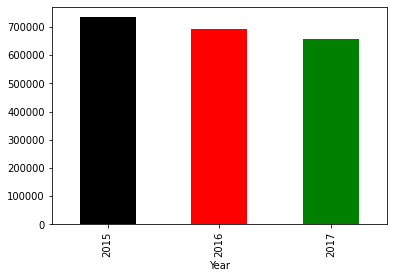

In [107]:
df2=df.groupby(['Year'])['Total Tested'].sum()
df2.plot(kind="bar", x='Total Tested', y='Year',color=['black', 'red', 'green',])

After filtering the data more students were tested during 2015 then the other two years.

In [87]:
df.groupby(['Regents Exam'])['Total Tested'].sum()

Regents Exam
Algebra2/Trigonometry               72631
Common Core Algebra                311279
Common Core Algebra2                58902
Common Core English                212971
Common Core Geometry               145106
English                             87699
Geometry                            60013
Global History and Geography       285302
Integrated Algebra                  72045
Living Environment                 281356
Physical Settings/Chemistry         90478
Physical Settings/Earth Science    124309
Physical Settings/Physics           42709
U.S. History and Government        239134
Name: Total Tested, dtype: int64

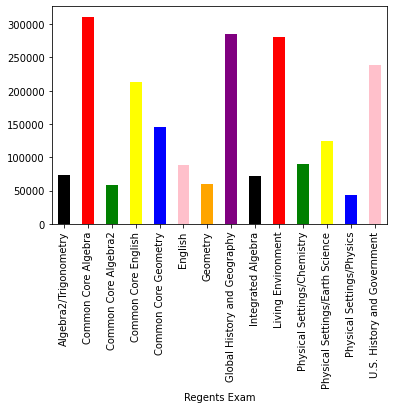

In [109]:
df4=df.groupby(['Regents Exam'])['Total Tested'].sum()
df4.plot(kind="bar", x='Total Tested', y='Regents Exam', color=['black', 'red', 'green','yellow','blue','pink', 'orange', 'purple','black', 'red', 'green','yellow','blue','pink'])

More students were tested in 2015 then either of the following years and of the total tested more students were tested in Common Core Algebra. Now lets see how many stundents were tested in common core alegra yearly. 

In [102]:
df_algebra=df[df['Regents Exam']=='Common Core Algebra']

In [104]:
df_algebra_c=df_algebra.groupby(['Year'])['Total Tested'].sum()

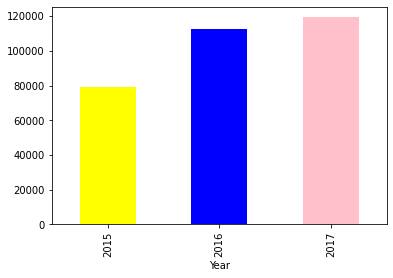

In [111]:
df_algebra_c.plot(kind="bar", x='Total Tested', y='Year', color= ['yellow','blue','pink'])

In [106]:
df_algebra_c

Year
2015     79091
2016    112810
2017    119378
Name: Total Tested, dtype: int64

In conclusion more students were tested in in Common Core Algebar in 2017 than in the previous years even though more students were tested overall in 2015. I can be suggested that as the years went on, the schools determined there was not a need to have as many students tested by instead focused on Specific Regent Exams.  For example, more students were tested in Common Core Algebra than Algebra 2, Common Core Algebra 2, Geometry and Integrated Algebra combined. 